# **Lab: Unstructured Data**



## Exercise 1: MNIST

In this exercise, we will build a Convolution Neural Networks with Pytorch for recognising handwritten digits. We will be working on the MNIST dataset:
https://pytorch.org/vision/0.8/datasets.html#mnist

The steps are:
1.   Setup Repository
2.   Load Dataset
3.   Prepare Data
4.   Define Architecture
5.   Train Model
6.   Push Changes


### 1. Setup Repository

**[1.1]** Go to a folder of your choice on your computer (where you store projects)

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Go to a folder of your choice on your computer (where you store projects)

In [ ]:
# Solution
cd ~/Projects/

**[1.2]** Copy the cookiecutter data science template

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Copy the cookiecutter data science template

In [ ]:
# Solution
cookiecutter -c v1 https://github.com/drivendata/cookiecutter-data-science

Follow the prompt (name the project and repo adv_dsi_lab_6)

**[1.3]** Go inside the created folder `adv_dsi_lab_6`


In [ ]:
# Placeholder for student's code (1 command line)
# Task: Go inside the created folder adv_dsi_lab_6

In [ ]:
# Solution
cd adv_dsi_lab_6

**[1.4]** Create a file called `Dockerfile` and add the following content:

`FROM jupyter/scipy-notebook:0ce64578df46`

`RUN pip install torch==1.9.0+cpu torchvision==0.10.0+cpu torchtext==0.10.0 -f https://download.pytorch.org/whl/torch_stable.html`

`ENV PYTHONPATH "${PYTHONPATH}:/home/jovyan/work"`

`RUN echo "export PYTHONPATH=/home/jovyan/work" >> ~/.bashrc`

`WORKDIR /home/jovyan/work`


In [ ]:
# Placeholder for student's code (1 command line)
# Task: Create a file called Dockerfile 

In [ ]:
# Solution
vi Dockerfile

We will create our own Docker image based on the official jupyter/scipy-notebook.

**[1.5]** Build the image from this Dockerfile

In [ ]:
docker build -t pytorch-notebook:latest .

Syntax: docker build [OPTIONS] PATH 

Options:

`-t: Name and optionally a tag in the 'name:tag' format`

Documentation: https://docs.docker.com/engine/reference/commandline/build/

**[1.6]** Run the built image

In [ ]:
docker run  -dit --rm --name adv_dsi_lab_6 -p 8888:8888 -e JUPYTER_ENABLE_LAB=yes -v ~/Projects/adv_dsi/adv_dsi_lab_6:/home/jovyan/work -v ~/Projects/adv_dsi/src:/home/jovyan/work/src pytorch-notebook:latest 

**[1.7]** Display last 50 lines of logs

In [ ]:
docker logs --tail 50 adv_dsi_lab_6

Copy the url displayed and paste it to a browser in order to launch Jupyter Lab

**[1.8]** Initialise the repo

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Initialise the repo

In [ ]:
# Solution
git init

**[1.9]** Login into Github with your account (https://github.com/) and create a public repo with the name `adv_dsi_lab_6`

**[1.10]** In your local repo `adv_dsi_lab_6`, link it with Github (replace the url with your username)

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Link repo with Github

In [ ]:
# Solution
git remote add origin git@github.com:<username>/adv_dsi_lab_1_6.git

**[1.11]** Add you changes to git staging area and commit them

In [ ]:
# Placeholder for student's code (2 command lines)
# Task: Add you changes to git staging area and commit them

In [ ]:
# Solution
git add .
git commit -m "init"

**[1.12]** Push your master branch to origin

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Push your master branch to origin

In [ ]:
# Solution
git push --set-upstream origin master

**[1.13]** Preventing push to `master` branch

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Preventing push to master branch

In [ ]:
# Solution
git config branch.master.pushRemote no_push

**[1.14]** Create a new git branch called `pytorch_mnist`

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Create a new git branch called pytorch_mnist

In [ ]:
# Solution
git checkout -b pytorch_mnist

**[1.15]** Navigate the folder `notebooks` and create a new jupyter notebook called `1_pytorch_mnist.ipynb`

### 2.   Load Dataset

**[2.1]** Import the torch and torchvision packages

In [ ]:
# Placeholder for student's code (3 lines of Python code)
# Task: Import the torch and torchvision packages

In [1]:
#Solution
import torch
import torchvision

**[2.2]** Create a variable called `download` containing the value `True`

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Create a variable called download containing the value True

In [2]:
#Solution
download = True

**[2.3]** Define a transformation pipeline that will convert the images into tensors and normalise them


In [3]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.1307,), (0.3081,))
])

**[2.4]** Instantiate a torchvision.datasets.MNIST() for the training set, downlows it into `/data/raw/` folder and perform the transformation defined earlier. Save the results in a variable called `train_data`

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Instantiate a torchvision.datasets.MNIST() for the training set, downlows it into /data/raw/ folder and perform the transformation defined earlier. Save the results in a variable called train_data

In [4]:
# Solution
train_data = torchvision.datasets.MNIST('../data/raw/', train=True, download=download, transform=transform)


Extracting ../data/raw/MNIST/raw/train-images-idx3-ubyte.gz to ../data/raw/MNIST/raw




Extracting ../data/raw/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/raw/MNIST/raw




Extracting ../data/raw/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/raw/MNIST/raw




Extracting ../data/raw/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/raw/MNIST/raw



/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


**[2.5]** Instantiate a torchvision.datasets.MNIST() for the testing set, downlows it into `/data/raw/` folder and perform the transformation defined earlier. Save the results in a variable called `test_data`

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Instantiate a torchvision.datasets.MNIST() for the testing set, downlows it into /data/raw/ folder and perform the transformation defined earlier. Save the results in a variable called test_data

In [5]:
# Solution
test_data = torchvision.datasets.MNIST('../data/raw/', train=False, download=download, transform=transform)

### 3. Prepare Data

**[3.1]** Create 2 variables called `batch_size_train` and `batch_size_test` that will respectively take the values 64 and 10

In [ ]:
# Placeholder for student's code (2 lines of Python code)
# Task: Create 2 variables called batch_size_train and batch_size_test that will respectively take the values 64 and 10

In [7]:
# Solution
batch_size_train = 64
batch_size_test = 10

**[3.2]** Import DataLoader from torch.utils.data

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Import DataLoader from torch.utils.data

In [8]:
# Solution:
from torch.utils.data import DataLoader

**[3.3]** Instantiate a `torch.utils.data.DataLoader()` on the training data, with the relevant batch size and with shuffle. Save the reults in a variable called `train_loader`

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Instantiate a torch.utils.data.DataLoader() on the training data, with the relevant batch size and with shuffle. Save the reults in a variable called train_loader

In [9]:
# Solution
train_loader = DataLoader(train_data, batch_size=batch_size_train, shuffle=True)

**[3.4]** Instantiate a `torch.utils.data.DataLoader()` on the testing data, with the relevant batch size and with shuffle. Save the reults in a variable called `test_loader`

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Instantiate a torch.utils.data.DataLoader() on the testing data, with the relevant batch size and with shuffle. Save the reults in a variable called test_loader

In [10]:
# Solution
test_loader = DataLoader(test_data, batch_size=batch_size_test, shuffle=True)

**[3.5]** Create a generator on the test data loader and extract the first observation

In [11]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

**[3.6]** Print the dimensions of the first image

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Print the dimensions of the first image

In [18]:
# Solution
example_data.shape

torch.Size([10, 1, 28, 28])

**[3.7]** Import matplotlib.pyplot as plt

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Import matplotlib.pyplot as plt

In [19]:
# Solution
import matplotlib.pyplot as plt

**[3.8]** Print the first image with its corresponding target

Text(0.5, 1.0, 'Ground Truth: 6')

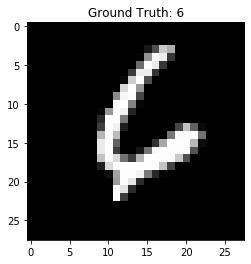

In [20]:
plt.imshow(example_data[0][0], cmap='gray', interpolation='none')
plt.title("Ground Truth: {}".format(example_targets[0]))

### 4. Define Architecture

**[4.1]** Import torch.nn as n, torch.nn.functional as F and torch.optim as optim

In [ ]:
# Placeholder for student's code (3 lines of Python code)
# Task: Import torch.nn as n, torch.nn.functional as F and torch.optim as optim

In [32]:
# Solution
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

m1 = nn.Conv2d(1, 128, kernel_size=3)
m2 = nn.Conv2d(128, 64, kernel_size=3)
input = example_data
input = m1(input)
print(input.shape)
print(m2(input).shape)
print(25*64)

torch.Size([10, 128, 26, 26])
torch.Size([10, 64, 24, 24])
1600


**[4.2]** Create a class called `PytorchCNN` that inherits from `nn.Module` with:
- attributes:
    - `conv1`: fully-connected layer with 128 filters of size 3
    - `conv2`: fully-connected layer with 64 filters of size 3
    - `fc1`: fully-connected layer with 128 neurons
    - `fc2`: fully-connected layer with 10 neurons
    - `softmax`: Softmax activation function
- methods:
    - `forward()` with `inputs` as input parameter and will sequentially add the 2 convolution layers with relu and max pool of size 2 followed the 2 full-connected layers respectively with relu and softmax

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Create a numpy array called y_base of dimensions (len(y_train), 1) filled with this value

In [33]:
# Solution:
class PytorchCNN(nn.Module):
    def __init__(self):
        super(PytorchCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 128, kernel_size=3)
        self.conv2 = nn.Conv2d(128, 64, kernel_size=3)
        self.fc1 = nn.Linear(1600, 128)
        self.fc2 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return self.softmax(x)

**[4.3]** Instantiate a PytorchCNN and save it into a variable called `model` 

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Instantiate a PytorchCNN and save it into a variable called model

In [34]:
# Solution:
model = PytorchCNN()

**[4.4]** Import the `get_device` function from src.models.pytorch 

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Import the get_device function from src.models.pytorch

In [35]:
# Solution:
from src.models.pytorch import get_device

**[4.5]** Get the device available and set to the model to use it

In [ ]:
# Placeholder for student's code (2 lines of Python code)
# Task: Get the device available and set to the model to use it

In [36]:
# Solution:
device = get_device()
model.to(device)

PytorchCNN(
  (conv1): Conv2d(1, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

### 5. Train the model

**[5.1]** Import train_classification and test_classification from src.models.pytorch

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Import train_classification and test_classification from src.models.pytorch

In [ ]:
# Solution:
from src.models.pytorch import train_classification, test_classification

**[5.2]** Instantiate a `nn.CrossEntropyLoss()` and save it into a variable called `criterion`

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Instantiate a nn.CrossEntropyLoss() and save it into a variable called criterion

In [ ]:
# Solution:
criterion = nn.CrossEntropyLoss()

**[5.3]** Instantiate a torch.optim.Adam() optimizer with the model's parameters and 0.001 as learning rate and save it into a variable called optimizer

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Instantiate a torch.optim.Adam() optimizer with the model's parameters and 0.001 as learning rate and save it into a variable called optimizer

In [ ]:
# Solution:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

**[5.4]** Create 2 variables called `N_EPOCHS` and `BATCH_SIZE` that will respectively take the values 50 and 32

In [ ]:
# Placeholder for student's code (2 lines of Python code)
# Task: Create 2 variables called N_EPOCHS and BATCH_SIZE that will respectively take the values 50 and 32

In [ ]:
# Solution:
N_EPOCHS = 5
BATCH_SIZE = 32

**[5.5]** Create a for loop that will iterate through the specified number of epochs and will train the model with the training set and assess the performance on the validation set and print their scores

In [ ]:
# Placeholder for student's code (multiples lines of Python code)
# Task: Create a for loop that will iterate through the specified number of epochs and will train the model with the training set and assess the performance on the validation set and print their scores

In [ ]:
# Solution:
for epoch in range(N_EPOCHS):
    train_loss, train_acc = train_classification(train_data, model=model, criterion=criterion, optimizer=optimizer, batch_size=BATCH_SIZE, device=device)
    valid_loss, valid_acc = test_classification(test_data, model=model, criterion=criterion, batch_size=BATCH_SIZE, device=device)

    print(f'Epoch: {epoch}')
    print(f'\t(train)\t|\tLoss: {train_loss:.4f}\t|\tAcc: {train_acc * 100:.1f}%')
    print(f'\t(valid)\t|\tLoss: {valid_loss:.4f}\t|\tAcc: {valid_acc * 100:.1f}%')

**[5.6]** Save the model into the `models` folder

In [ ]:
# Placeholder for student's code (1 line of Python code)
# Task: Save the model into the models folder

In [ ]:
# Solution:
torch.save(model, "../models/pytorch_mnist_cnn.pt")

### 6.   Push changes

**[6.1]** Add you changes to git staging area

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Add you changes to git staging area

In [ ]:
# Solution:
git add .

**[6.2]** Create the snapshot of your repository and add a description

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Create the snapshot of your repository and add a description

In [ ]:
# Solution:
git commit -m "pytorch cnn mnist"

**[6.3]** Push your snapshot to Github

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Push your snapshot to Github

In [ ]:
# Solution:
git push

**[6.4]** Check out to the master branch

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Check out to the master branch

In [ ]:
# Solution:
git checkout master

**[6.5]** Pull the latest updates

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Pull the latest updates

In [ ]:
# Solution:
git pull

**[6.6]** Check out to the `pytorch_mnist` branch

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Merge the branch pytorch_mnist

In [ ]:
# Solution:
git checkout pytorch_mnist

**[6.7]** Merge the `master` branch and push your changes

In [ ]:
# Placeholder for student's code (2 command lines)
# Task: Merge the master branch and push your changes

In [ ]:
# Solution:
git merge master
git push

**[6.8]** Go to Github and merge the branch after reviewing the code and fixing any conflict

**[6.9]** Stop the Docker container

In [ ]:
# Placeholder for student's code (1 command line)
# Task: Stop the Docker container

In [ ]:
# Solution:
docker stop adv_dsi_lab_6